In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'Restaurant_Reviews.tsv',delimiter='\t',quoting=3)
df=pd.DataFrame(data)
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


<Axes: xlabel='Liked', ylabel='count'>

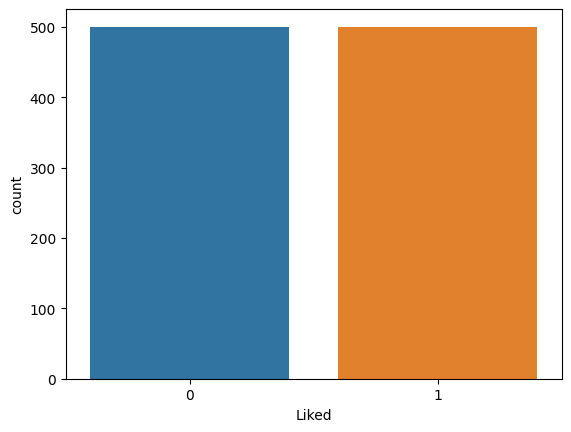

In [3]:
sns.countplot(data=df,x='Liked')

In [4]:
x=df.iloc[:,:-1].values
x

array([['Wow... Loved this place.'],
       ['Crust is not good.'],
       ['Not tasty and the texture was just nasty.'],
       ['Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.'],
       ['The selection on the menu was great and so were the prices.'],
       ['Now I am getting angry and I want my damn pho.'],
       ["Honeslty it didn't taste THAT fresh.)"],
       ['The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.'],
       ['The fries were great too.'],
       ['A great touch.'],
       ['Service was very prompt.'],
       ['Would not go back.'],
       ['The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.'],
       ['I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!'],
       ['I was disgusted because I was pretty sure that was human hair.'],
       ['I was shocked because no signs indicate cash only.'],
       ['Highly r

In [5]:
y=df.iloc[:,-1].values
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [6]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer # To perform stemming Loved ----> Love
corpus=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-z]'," ",df['Review'][i])
    review=review.lower()
    review=review.split()
    stemming=PorterStemmer()
    all_stopwords=stopwords.words('english')
    all_stopwords.remove('not')
    review=[stemming.stem(word) for word in review if not word in set(all_stopwords)]
    review=' '.join(review)
    corpus.append(review)




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gyanender\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(corpus)
X=X.toarray()

In [9]:
y=df.iloc[:,-1].values
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [10]:
len(X[1])

1566

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
print("X Train Shape", X_train.shape)
print("X Test Shape", X_test.shape)
print("Y Train Shape", y_train.shape)
print("Y Test Shape", y_test.shape)

X Train Shape (800, 1566)
X Test Shape (200, 1566)
Y Train Shape (800,)
Y Test Shape (200,)


In [14]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [17]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [18]:
models=[
        ("SVM",SVC()),
        ("LogisticRegression",LogisticRegression()),
        ("DecisionTreeClassifier",DecisionTreeClassifier(random_state=0)),
        ("RandomForestClassifier",RandomForestClassifier(n_estimators=100)),
        ("KNeighborsClassifier",KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')),
        ("NaiveBayes",GaussianNB())
        ]

In [19]:
result={}
for name,model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    report=classification_report(y_test,y_pred)
    cmatrix=confusion_matrix(y_test,y_pred)
    score=accuracy_score(y_test,y_pred)*100
    print("============================================= CLASSIFICATION REPORT ===============================================")
    print(f"Model Name {name}")
    print(report)
    print("============================================= CONFUSION MATRIX ===============================================")
    print(f"Model Name {name}")
    print(cmatrix)
    print("============================================= ACCURACY SCORE ===============================================")
    print(f"Model Name {name}")
    print(f"{name} Accuracy Score ::",score)
    result[name]=score

============================================= CLASSIFICATION REPORT ===============================================
Model Name SVM
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        97
           1       0.89      0.64      0.75       103

    accuracy                           0.78       200
   macro avg       0.80      0.78      0.77       200
weighted avg       0.80      0.78      0.77       200

============================================= CONFUSION MATRIX ===============================================
Model Name SVM
[[89  8]
 [37 66]]
============================================= ACCURACY SCORE ===============================================
Model Name SVM
SVM Accuracy Score :: 77.5
============================================= CLASSIFICATION REPORT ===============================================
Model Name LogisticRegression
              precision    recall  f1-score   support

           0       0.74      0.82      0.78  

In [20]:
result

{'SVM': 77.5,
 'LogisticRegression': 77.5,
 'DecisionTreeClassifier': 74.5,
 'RandomForestClassifier': 77.0,
 'KNeighborsClassifier': 64.5,
 'NaiveBayes': 73.0}

In [21]:
result_tuples = [(model, score) for model, score in result.items()]
df1=pd.DataFrame(result_tuples,columns=['ModelName','Score'])

Text(0, 0.5, 'Score')

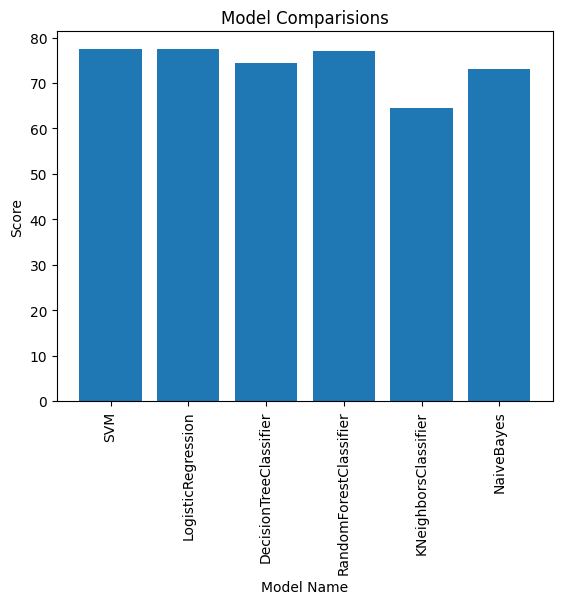

In [22]:
plt.title("Model Comparisions")
plt.xticks(rotation=90)
plt.bar(x=df1['ModelName'], height=df1['Score'])
plt.xlabel("Model Name")
plt.ylabel("Score")

In [23]:
c_matrix=confusion_matrix(y_test,y_pred)
print(c_matrix)

[[55 42]
 [12 91]]


<Axes: title={'center': 'Confusion Matrix Representation'}>

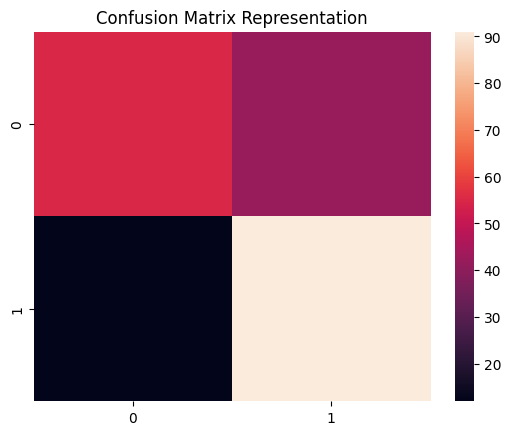

In [25]:
plt.title("Confusion Matrix Representation")
sns.heatmap(c_matrix)